# HLS and Color Thresholds

!['test6.jpg'](test6.jpg)

Various color thresholds can be applied to find the lane lines in images. 
Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. 
Let's first take another look at some of the images you saw in the last video.

Here we'll read in the same original image (the image above), 
convert to grayscale, and apply a threshold that identifies the lines:

Text(0.5,1,'Gray Binary')

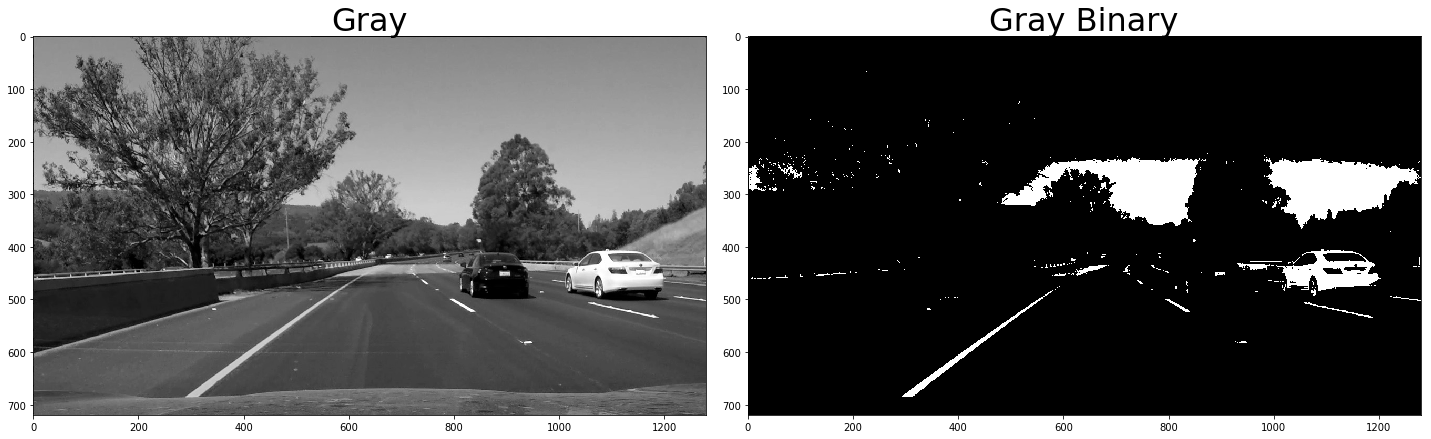

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

thresh = (180, 255)

image = mpimg.imread('test6.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
f.tight_layout()

ax1.imshow(gray, cmap = 'gray')
ax1.set_title("Gray", fontsize = 32)

ax2.imshow(binary, cmap = 'gray')
ax2.set_title("Gray Binary", fontsize = 32)

# Explore thresholding individual RGB color channels. 

Take a look at them side by side to see which ones do a better job of picking up the lane lines:


Text(0.5,1,'B')

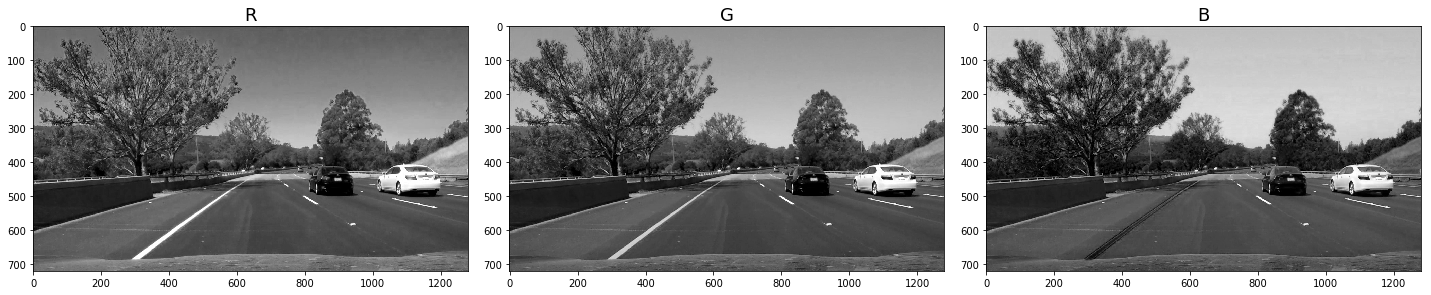

In [12]:
R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 12))
f.tight_layout()

ax1.imshow(R, cmap = 'gray')
ax1.set_title("R", fontsize = 18)

ax2.imshow(G, cmap = 'gray')
ax2.set_title("G", fontsize = 18)

ax3.imshow(B, cmap = 'gray')
ax3.set_title("B", fontsize = 18)

### R channel does a reasonable job of highlighting the lines

Apply a similar threshold to find lane-line pixels:

    

Text(0.5,1,'R Binary')

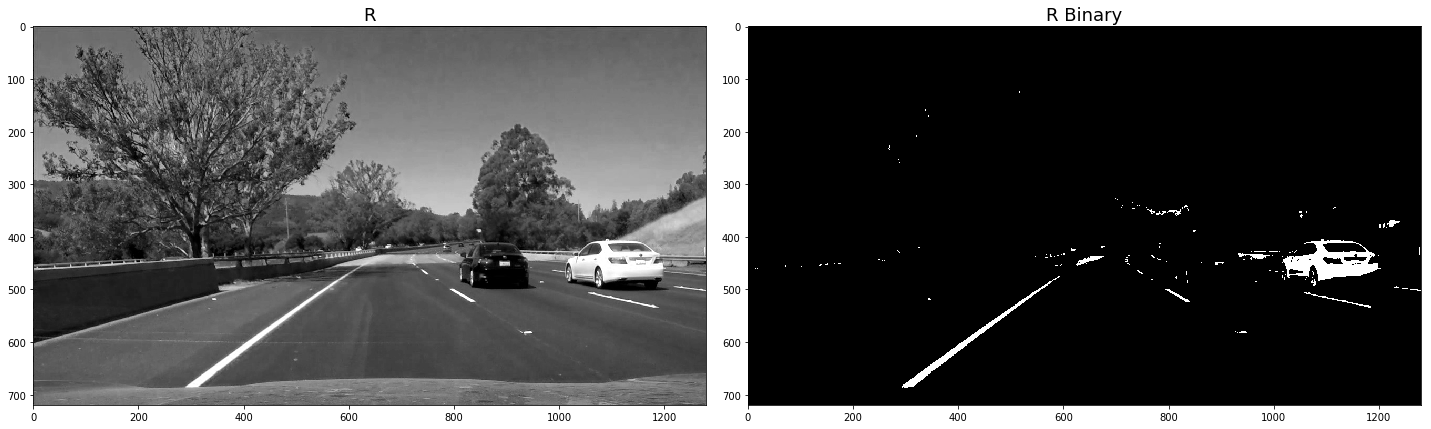

In [14]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
f.tight_layout()

ax1.imshow(R, cmap = 'gray')
ax1.set_title("R", fontsize = 18)

ax2.imshow(binary, cmap = 'gray')
ax2.set_title("R Binary", fontsize = 18)

# Now we're looking at different color spaces. 

- While there are several that are worth exploring, here we'll look specifically at HLS. 
- When we separate the H, L, and S channels we get the following result:


Text(0.5,1,'S')

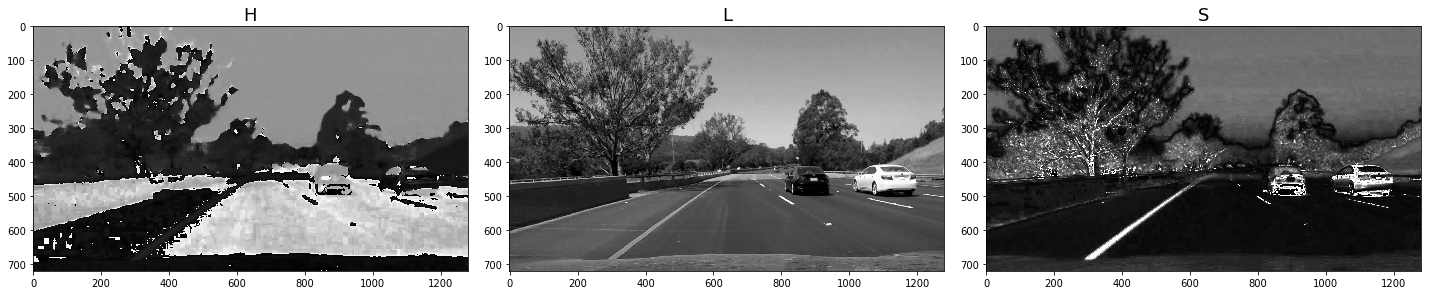

In [16]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 12))
f.tight_layout()

ax1.imshow(H, cmap = 'gray')
ax1.set_title("H", fontsize = 18)

ax2.imshow(L, cmap = 'gray')
ax2.set_title("L", fontsize = 18)

ax3.imshow(S, cmap = 'gray')
ax3.set_title("S", fontsize = 18)

Text(0.5,1,'S Binary')

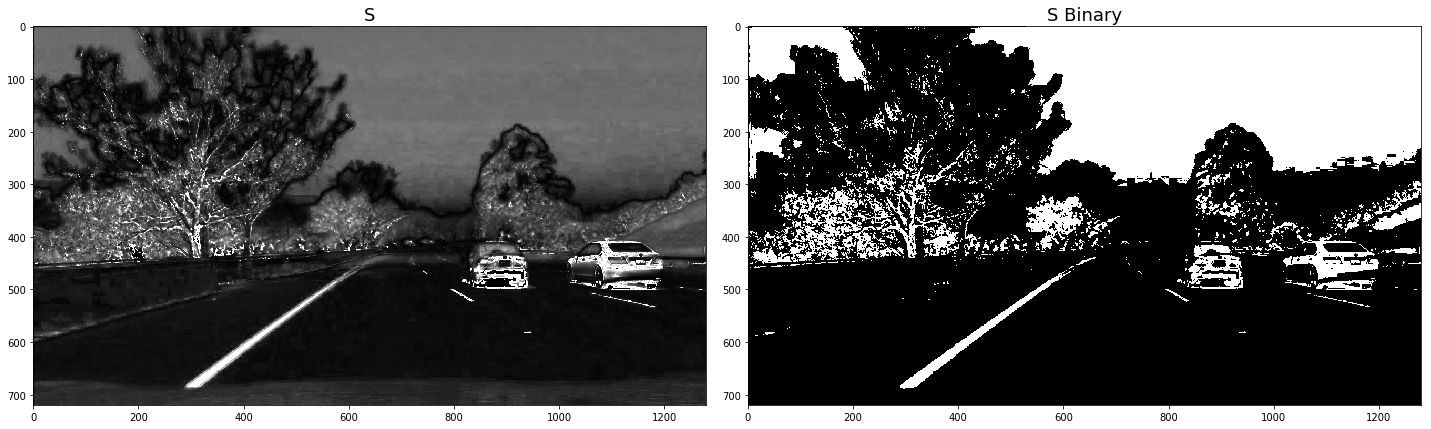

In [17]:
# S channel picks up the lines well, so let's try applying a threshold there:

thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
f.tight_layout()

ax1.imshow(S, cmap = 'gray')
ax1.set_title("S", fontsize = 18)

ax2.imshow(binary, cmap = 'gray')
ax2.set_title("S Binary", fontsize = 18)

Text(0.5,1,'H Binary')

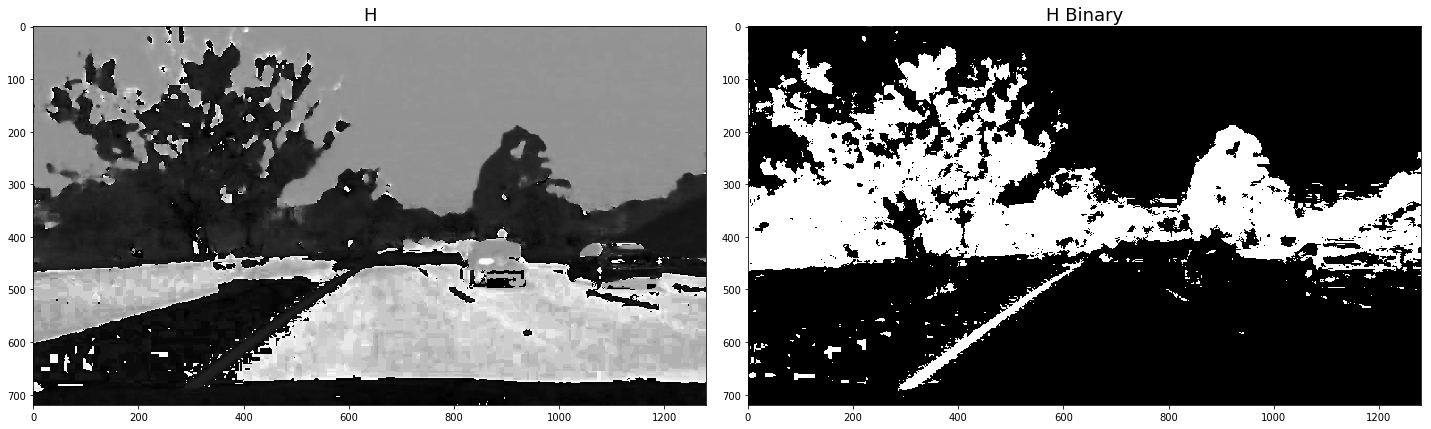

In [19]:
# weu can also see that in the H channel, the lane lines appear dark, 
# so we could try a low threshold there and obtain the following result:

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 16))
f.tight_layout()

ax1.imshow(H, cmap = 'gray')
ax1.set_title("H", fontsize = 18)

ax2.imshow(binary, cmap = 'gray')
ax2.set_title("H Binary", fontsize = 18)

### From these examples, looks like S channel is probably the best bet. 

- It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling. 
- But it's not clear that one method is far superior to the others.

In each case, we've tweaked the threshold parameters to do as good a job as possible of picking out the lines. 
Where we can really see a difference in results, however, is when we step to a new frame, 
where there are shadows and different colors in the pavement.

Look at the same thresholds applied to each of these four channels for this image (test4.jpg):
    
!['test4.jpg'](test4.jpg)

### Here's how the various channels and binaries (with the same threshold values as above) look:


Text(0.5,1,'H Binary')

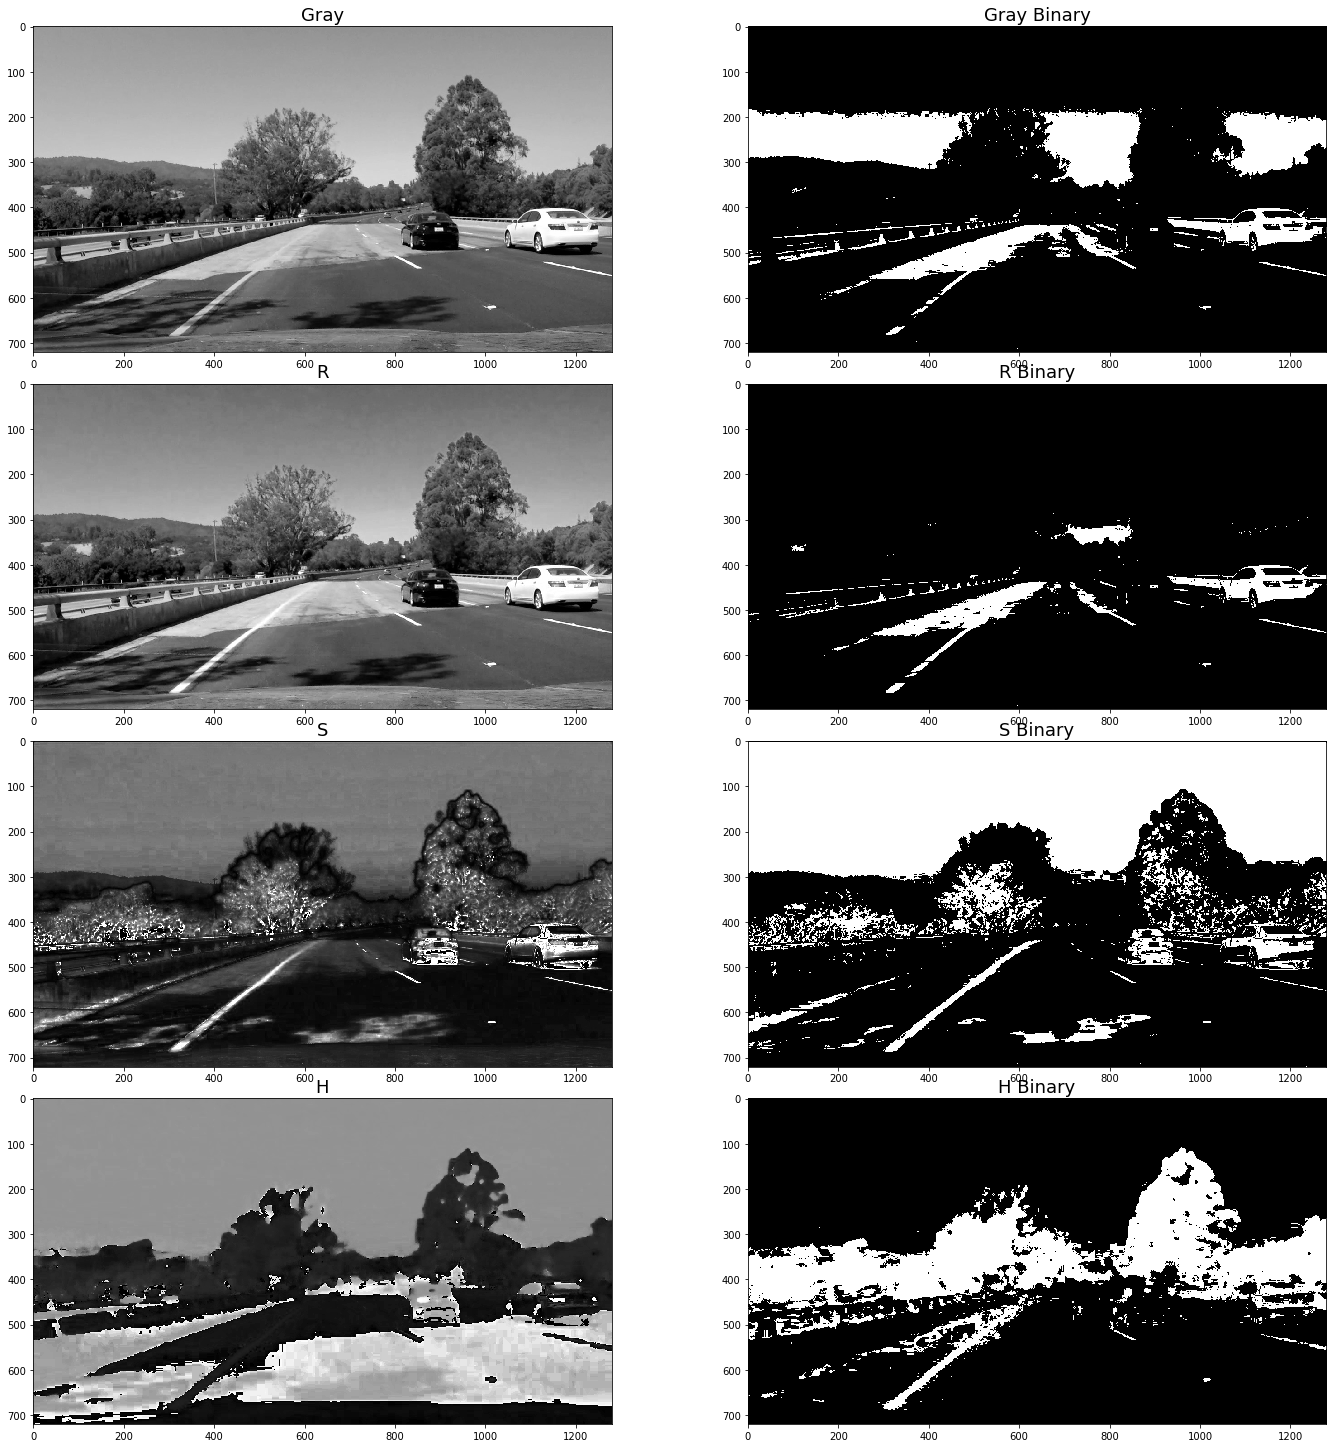

In [22]:
image = mpimg.imread('test4.jpg')

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
thresh = (180, 255)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

R = image[:,:,0]
thresh = (200, 255)
rbinary = np.zeros_like(R)
rbinary[(R > thresh[0]) & (R <= thresh[1])] = 1

hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
S = hls[:,:,2]
H = hls[:,:,0]
thresh = (90, 255)
sbinary = np.zeros_like(S)
sbinary[(S > thresh[0]) & (S <= thresh[1])] = 1

thresh = (15, 100)
hbinary = np.zeros_like(H)
hbinary[(H > thresh[0]) & (H <= thresh[1])] = 1

f, ax = plt.subplots(4, 2, figsize=(20, 20))
f.tight_layout()

ax[0, 0].imshow(gray, cmap = 'gray')
ax[0, 0].set_title("Gray", fontsize = 18)
ax[0, 1].imshow(binary, cmap = 'gray')
ax[0, 1].set_title("Gray Binary", fontsize = 18)

ax[1, 0].imshow(R, cmap = 'gray')
ax[1, 0].set_title("R", fontsize = 18)
ax[1, 1].imshow(rbinary, cmap = 'gray')
ax[1, 1].set_title("R Binary", fontsize = 18)

ax[2, 0].imshow(S, cmap = 'gray')
ax[2, 0].set_title("S", fontsize = 18)
ax[2, 1].imshow(sbinary, cmap = 'gray')
ax[2, 1].set_title("S Binary", fontsize = 18)

ax[3, 0].imshow(H, cmap = 'gray')
ax[3, 0].set_title("H", fontsize = 18)
ax[3, 1].imshow(hbinary, cmap = 'gray')
ax[3, 1].set_title("H Binary", fontsize = 18)

# S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, 
- while the other selections look messy. 
- Could tweak the thresholds and get closer in the other channels, 
- but the S channel is preferable because it is more robust to changing conditions.

### It's worth noting, however, that the R channel still does rather well on the white lines, 
- perhaps even better than the S channel. 

# As with gradients, it's worth considering how you might combine various color thresholds 
- to make the most robust identification of the lines.